In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from datetime import datetime
import networkx as nx
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/gdrive/My Drive/tweetsConvereted2017_toxicPerspectiveScore.csv")

In [4]:
df["week"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%U"))
df["month"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m"))
df["day"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%d"))

In [5]:
G = nx.read_edgelist('/content/gdrive/My Drive/users.edgelist')

In [6]:
groupDf = df[['user_id', 'Toxicity','week','month']]

In [7]:
groupDf2 = groupDf[['user_id', 'Toxicity','week','month']].astype({'user_id': str, 'week': str, 'month': str})

In [21]:
groupedDf = groupDf2.groupby(['user_id']).agg({'Toxicity': 'mean'}).reset_index()

In [22]:
users_list = list(groupedDf['user_id'].unique().astype(str))

In [23]:
G2 = G.subgraph(users_list)

In [24]:
G2.number_of_nodes()

59848

In [25]:
user_toxicity = groupedDf.set_index('user_id')['Toxicity'].to_dict()

In [26]:
user_toxicity_means = {}
neighbor_toxicity_means = {}

In [27]:
neighbor_toxicity = {}
for user in G2.nodes():
  neighbors = list(G2.neighbors(user))
  if user in neighbors:
      neighbors.remove(user)
  if len(neighbors) > 0:
      neighbor_toxicity[user] = groupedDf[groupedDf['user_id'].isin(neighbors)]['Toxicity'].mean()

In [28]:
x = [user_toxicity[user] for user in neighbor_toxicity.keys()]
y = list(neighbor_toxicity.values())

([<matplotlib.axis.XTick at 0x7f370b660c10>,
 <a list of 11 Text major ticklabel objects>)

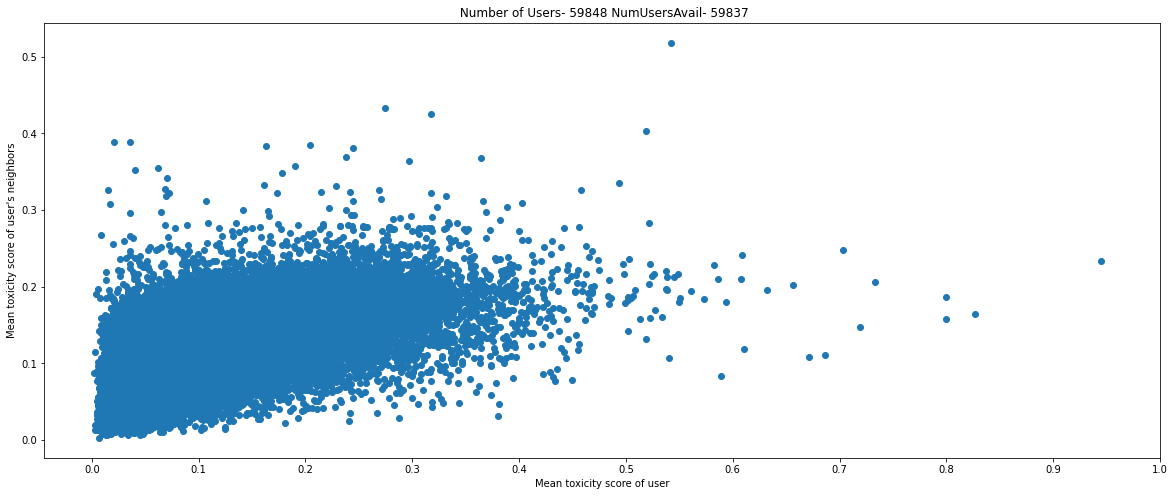

In [29]:
plt.figure(figsize=(20,8))
plt.scatter(x, y)
plt.xlabel('Mean toxicity score of user')
plt.ylabel('Mean toxicity score of user\'s neighbors')
plt.title(' Number of Users- '+ str(G2.number_of_nodes())+' NumUsersAvail- ' +str(len(y)))
plt.xticks([i/10 for i in range(0, 11)])
# plt.yticks([i/10 for i in range(0, 11)])

In [ ]:
# num_processes = 4
# pool = Pool(num_processes)
# results = pool.map(compute_user_stats, G2.nodes())
# pool.close()
# # extract the results into separate lists
# user_toxicity_means, neighbor_toxicity_means = zip(*results)

In [ ]:
'''
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from datetime import datetime
import networkx as nx
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("/content/gdrive/My Drive/tweetsConvereted2017_toxicPerspectiveScore.csv")
df["week"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%U"))
df["month"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m"))
df["day"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").day)

G = nx.read_edgelist('/content/gdrive/My Drive/users.edgelist')
groupDf = df[['user_id', 'Toxicity','week','month']]
users_list = list(groupDf['user_id'].unique().astype(str))
G2 = G.subgraph(users_list)

def get_neighbour_toxicity_mean(user):
  neighbours = list(G2.neighbors(user))
  temp_list = []
  for neigh in neighbours:
    neighbourDf = groupDf[groupDf['user_id'].astype(str) ==neigh]
    mean_toxicity = neighbourDf['Toxicity'].mean()
    temp_list.append(mean_toxicity)
  return sum(temp_list)/len(temp_list)

def get_user_toxicity_mean(user):
  userDf = groupDf[groupDf['user_id'].astype(str) ==user]
  return userDf['Toxicity'].mean()

user_toxicity_means = []
neighbor_toxicity_means = []

for user in G2.nodes():
  user_mean = get_user_toxicity_mean(user)
  neighbour_mean = get_neighbour_toxicity_mean(user)
  user_toxicity_means.append(user_mean)
  neighbor_toxicity_means.append(neighbour_mean)

plt.figure(figsize=(15,10))
plt.scatter(user_toxicity_means, neighbor_toxicity_means)
plt.xlabel('Mean toxicity score of user')
plt.ylabel('Mean toxicity score of user\'s neighbors')

# plt.xticks([i/10 for i in range(0, 11)])
# plt.yticks([i/10 for i in range(0, 11)])
plt.show()
'''

'\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport matplotlib.ticker as ticker\nimport numpy as np\nfrom datetime import datetime\nimport networkx as nx\nimport warnings\nwarnings.filterwarnings("ignore")\n\ndf = pd.read_csv("/content/gdrive/My Drive/tweetsConvereted2017_toxicPerspectiveScore.csv")\ndf["week"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%U"))\ndf["month"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m"))\ndf["day"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").day)\n\nG = nx.read_edgelist(\'/content/gdrive/My Drive/users.edgelist\')\ngroupDf = df[[\'user_id\', \'Toxicity\',\'week\',\'month\']]\nusers_list = list(groupDf[\'user_id\'].unique().astype(str))\nG2 = G.subgraph(users_list)\n\ndef get_neighbour_toxicity_mean(user):\n  neighbours = list(G2.neighbors(user))\n  temp_list = []\n  for neigh in neighbours:\n    neighbourDf = grou